In [2]:
import math
import itertools
import matplotlib.pyplot as plt

figsize=(25, 6.25)
colors = "#323031", "#308E91", "#34369D","#5E2A7E", "#5E2A7E", "#6F3384"

hz = 1
SR = 41000

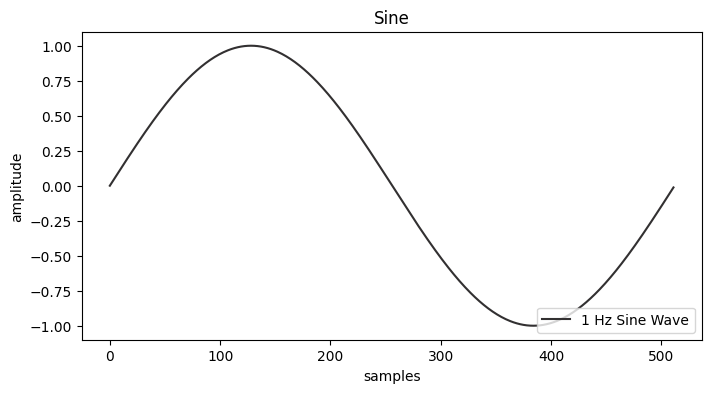

In [3]:
def get_sin_oscillator(freq, sample_rate=44100, amp=1, phase = 0):
    phase = (phase / 360) * 2 * math.pi
    increment = (2 * math.pi * freq) / sample_rate
    return (math.sin(v + phase) * amp for v in itertools.count(start = 0, step = increment))

def get_n(iterator, n):
    return [next(iterator) for i in range(n)]

def plot(xy, r=1,c=1,i=1,title="", xlabel="",ylabel="",yticks=None, xticks=None,**plot_kwargs):
    plt.subplot(r,c,i)
    plt.title(title)
    if len(xy) == 2:
        plt.plot(*xy, **plot_kwargs)
    else:
        plt.plot(xy, **plot_kwargs)
        
    if xticks is not None: plt.xticks(xticks)
    if yticks is not None: plt.yticks(yticks)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

fig = plt.figure(figsize=(4*2,2*2))

osc = get_sin_oscillator(freq = 1, sample_rate = 512)
samples = [next(osc) for i in range(512)]

hz = 1
wave = get_n(osc,512)

plot(wave, title="Sine", label=f"{hz} Hz Sine Wave", xlabel = "samples", ylabel="amplitude", color="#323031")

plt.legend(loc='lower right')
plt.show()

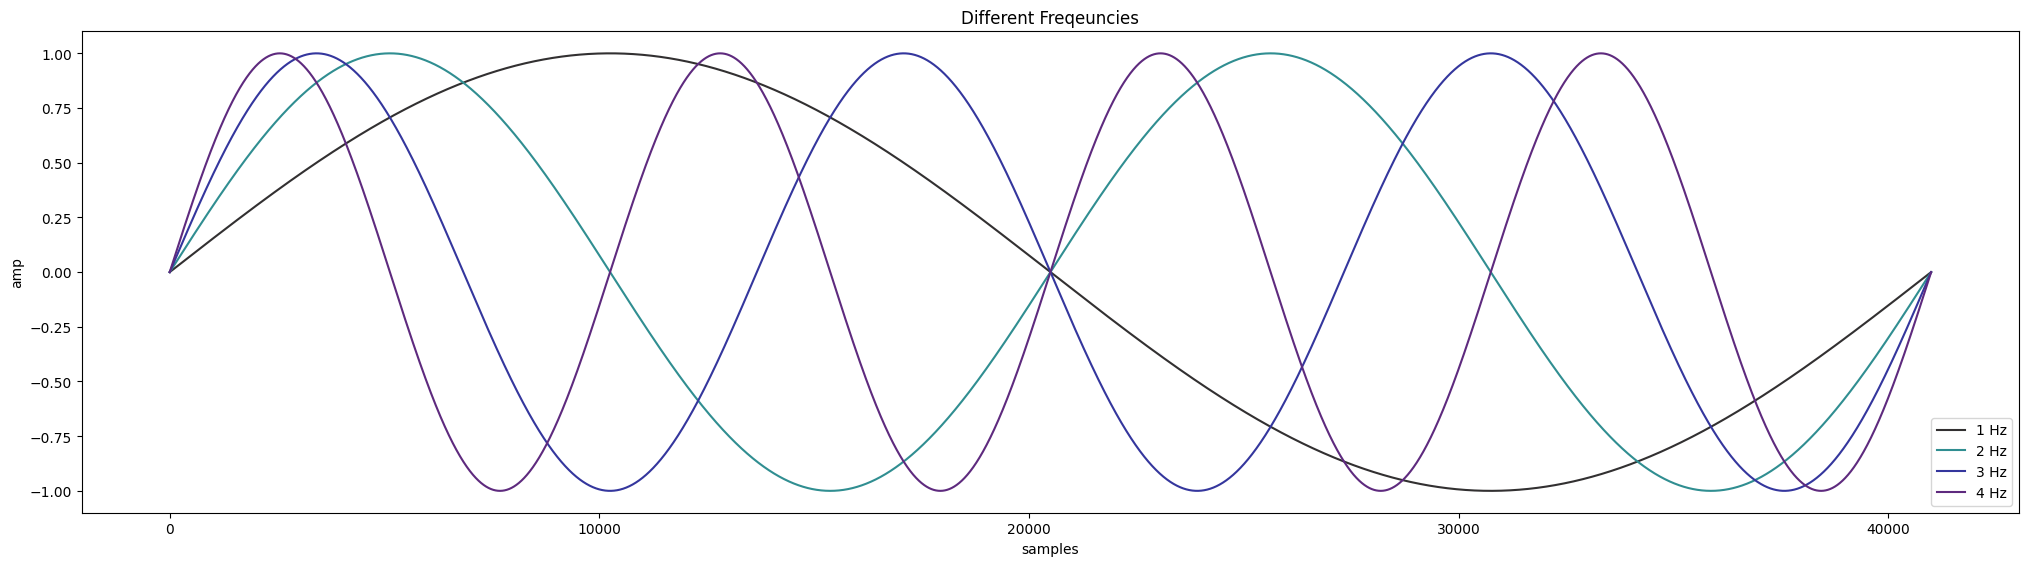

In [4]:
fig = plt.figure(figsize=figsize)
plt.title("Different Freqeuncies")

for hz,c in zip([1,2,3,4], colors):
    osc = get_sin_oscillator(freq=hz, sample_rate=SR)
    wave = get_n(osc, SR)
    plt.plot(wave,label=f"{hz} Hz", color=c)

plt.ylabel("amp")
plt.xlabel("samples")
plt.legend(loc="lower right")
plt.show()

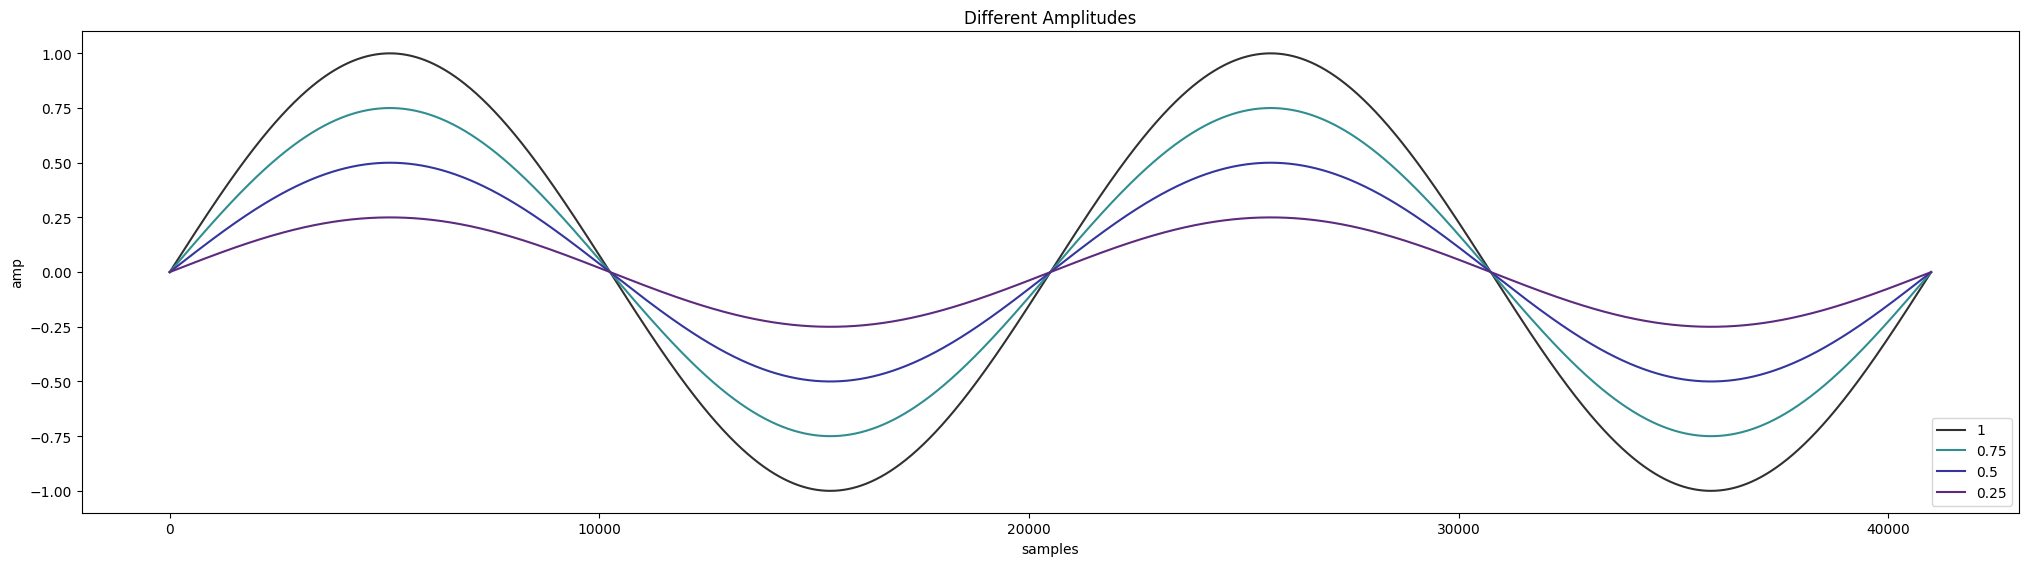

In [5]:
fig = plt.figure(figsize=figsize)
plt.title("Different Amplitudes")

for amp,c in zip([1,0.75,0.5,0.25], colors):
    osc = get_sin_oscillator(freq=2, sample_rate=SR, amp=amp); 
    wave = get_n(osc, SR)
    plt.plot(wave, label=f"{amp}", color=c)

plt.ylabel("amp")
plt.xlabel("samples")
plt.legend(loc='lower right')
plt.show()

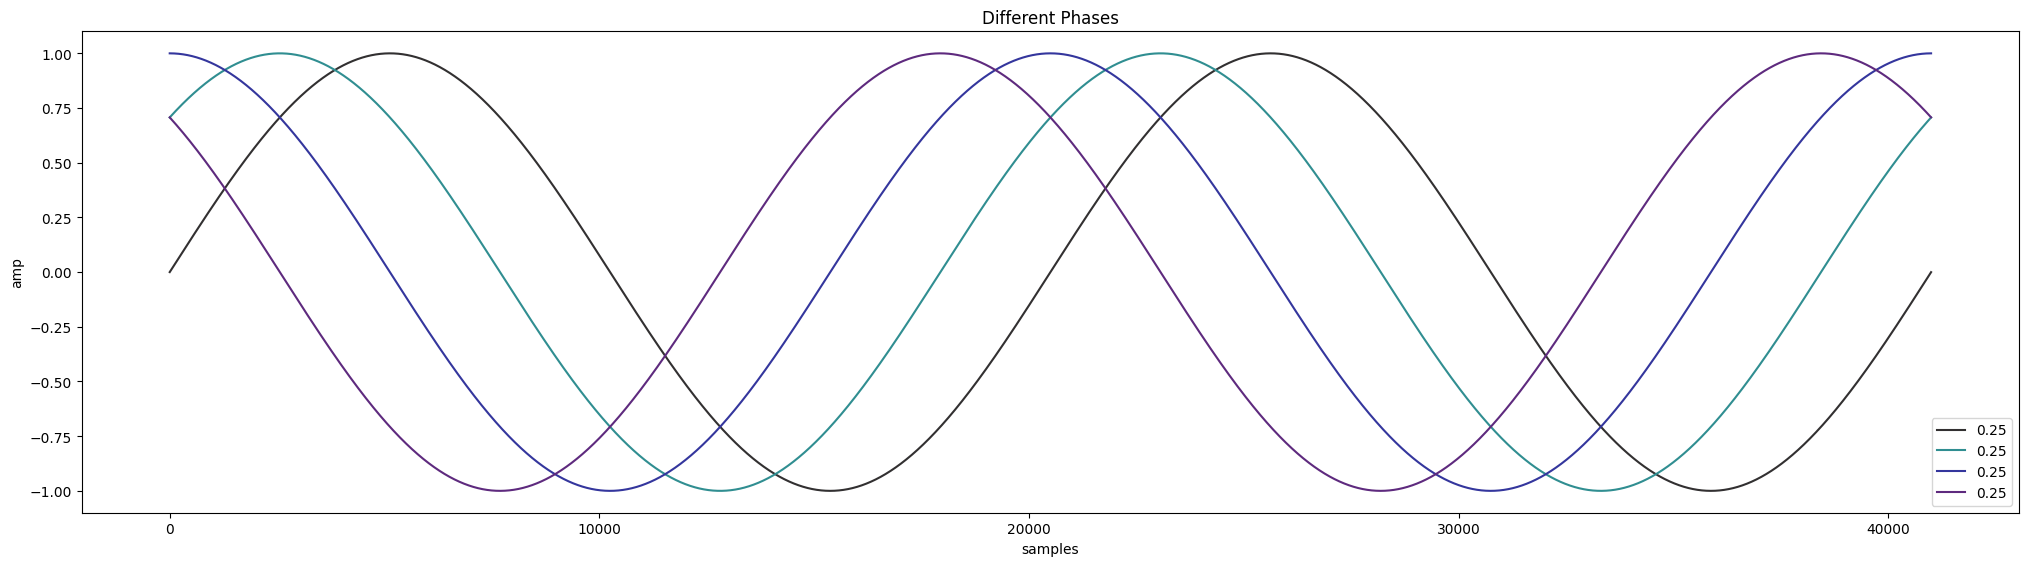

In [6]:
fig = plt.figure(figsize=figsize)
plt.title("Different Phases")

for ph,c in zip([0,45,90,135], colors):
    osc = get_sin_oscillator(freq=2, sample_rate=SR, phase=ph); 
    wave = get_n(osc, SR)
    plt.plot(wave, label=f"{amp}", color=c)

plt.ylabel("amp")
plt.xlabel("samples")
plt.legend(loc='lower right')
plt.show()